<a href="https://colab.research.google.com/github/bernardogoltz/datascience-python-probabilidade/blob/main/revisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Revisando Conteúdo*

Nosso supervisor determinou que o erro máximo em relação a média deverá ser de apenas dez reais.

Sabemos que o Desvio Padrão Populacional deste grupo de trabalhadores é pouco mais de mil reais, e a Média Populacional é um pouco menos de mil e quinhentos reais.

Para um nível de confiança de 95%, qual deverá ser o tamanho da Amostra de nosso estudo? E qual o Intervalo de Confiança para a média, considerando o tamanho da Amostra obtido?

In [25]:
import pandas as pd
dados = pd.read_csv('dados.csv')
dados.head(3)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444


In [26]:
renda_5 = dados.query('Renda <= 5000').Renda
renda_5.head

<bound method NDFrame.head of 0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 72109, dtype: int64>

In [27]:
import numpy as np

In [31]:
def monetario(valor):
    resultado = round(valor,2)
    resultado = 'R$'+str(resultado)
    return resultado

#funcao da preguica monetaria kkkkkkkkkk

In [32]:
sigma = renda_5.std()
print(monetario(sigma))

R$1082.79


In [33]:
media = renda_5.mean()
print(monetario(media))

R$1426.54


### tamanho da amostra

In [49]:
(0.5)+(.95/2)

0.975

In [47]:
from scipy.stats import norm
z = norm.ppf(0.975)
z

1.959963984540054

In [50]:
e = 10
e

10

In [58]:
n = (z*(sigma)/e)**2
n = int(n)

print('A quantidade amostral suficiente é de {} elementos'.format(n))

A quantidade amostral suficiente é de 45038 elementos


### Intervalo de Confiança

In [70]:
intervalo = norm.interval(alpha = 0.95 , loc = media , scale = sigma / np.sqrt(n))
print('(R$',round(intervalo[0],2),(', R$'),round(intervalo[1],2),')') 

(R$ 1416.54 , R$ 1436.54 )


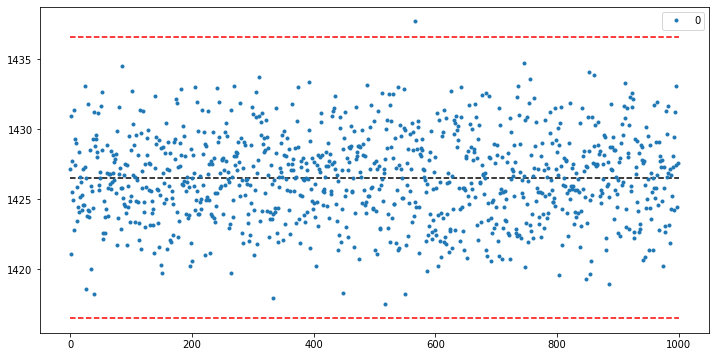

In [74]:
import matplotlib.pyplot as plt

tamanho_simulacao = 1000

medias = [renda_5.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)

ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax